# 消费者信心指数预测股票收益率

马欣驰 2021211282

预期：消费者信心指数会影响中国股票市场，且股票市场收益率的变化也会影响消费者信心指数，但是这种影响不一定能够及时出现。股票市场收益率上升会提高消费者信心从而提升会激发投资热情，但是两者产生影响的过程受时间影响，因此预测二者关系受经济周期影响而呈负相关。

In [97]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats # 统计模块
import scipy
from datetime import datetime # 时间模块
from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
import statsmodels.formula.api as smf  # OLS regression

#输出矢量图 渲染矢量图 是一个魔法函数（Magic Functions）内嵌绘图
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [98]:
data = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [99]:
daily_data = data['1995-01':'2022-07'].copy()
daily_data['Close'] = pd.to_numeric(daily_data['Close'])
daily_data['Preclose'] = pd.to_numeric(daily_data['Preclose'])
daily_data['Raw_return'] = daily_data['Close'] / daily_data['Preclose'] - 1
daily_data['Log_return'] = np.log(daily_data['Close']) - np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [100]:
Month_data = daily_data.resample('m')['Log_return'].sum().to_frame()
Month_data['Raw_return'] = np.exp(Month_data['Log_return']) - 1
Month_data.reset_index(inplace=True)
Month_data.rename(columns={'Day':'month'},inplace=True)
Month_data.set_index('month',inplace=True)
Month_data

,Log_return,Raw_return
month,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [101]:
Quarter_data = daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] = np.exp(Quarter_data['Log_return']) - 1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [102]:
Year_data = daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] = np.exp(Year_data['Log_return']) - 1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


In [103]:
# 引入2007-2022年消费者信心指数cci（数据值为cci/100）
Consumerconfidence = pd.read_excel('C:/Users/hp/Desktop/Python/Python-5/cci.xlsx')
Consumerconfidence['month'] = pd.to_datetime(Consumerconfidence['month'],format='%Y/%m/%d')
Consumerconfidence.set_index('month',inplace=True)
Consumerconfidence.sort_values(by=['month'],axis=0,ascending=True)

,cci
month,
2006-12-31,1.124
2007-01-31,1.118
2007-02-28,1.110
2007-03-31,1.123
2007-04-30,1.128
...,...
2022-06-30,0.879
2022-07-31,0.870
2022-08-31,0.872


In [104]:
# 引入cpi
inflation = pd.read_csv('C:/Users/hp/Desktop/Python/Python-5/inflation.csv')
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1987-01-31,5.1000
1987-02-28,5.4000
1987-03-31,5.8000
1987-04-30,6.7000
1987-05-31,7.6000
...,...
2022-04-30,2.1304
2022-05-31,2.1000
2022-06-30,2.5000


In [105]:
# 引入消费者信心指数cci
reg_data = pd.merge(Month_data,Consumerconfidence,on = 'month')
reg_data = pd.merge(reg_data,inflation,on = 'month')
reg_data

,Log_return,Raw_return,cci,cpi
month,,,,
2006-12-31,0.242526,0.274464,1.124,2.8000
2007-01-31,0.040604,0.041439,1.118,2.2000
2007-02-28,0.033433,0.033998,1.110,2.7000
2007-03-31,0.099970,0.105138,1.123,3.3000
2007-04-30,0.187671,0.206437,1.128,3.0000
...,...,...,...,...
2022-03-31,-0.062604,-0.060685,0.867,1.5000
2022-04-30,-0.065154,-0.063077,0.868,2.1304
2022-05-31,0.044724,0.045739,0.889,2.1000


## cci与中国股票市场收益率作图分析

由图像结果，消费者信心指数与中国股市收益率变化趋势相反，呈负相关。
消费者信心对股票市场的影响具有滞后性，通常在半年后体现。
由于疫情等因素，2021年消费者信心指数有异常波动。



CPU times: total: 172 ms
Wall time: 159 ms


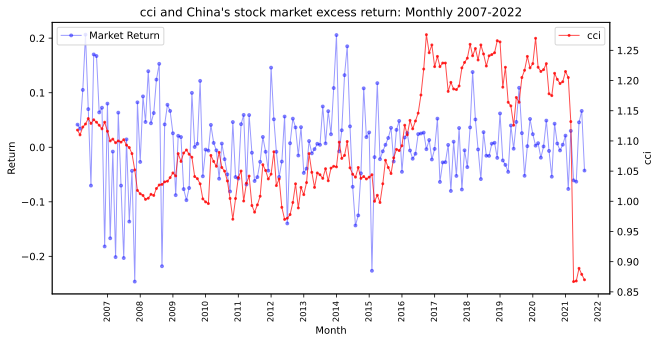

In [106]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  

ax1.plot(reg_data['2007-01':'2022-07']['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Month') 
ax1.set_ylabel('Return')  
ax1.legend(loc=2)  
ax1.set_title("cci and China's stock market excess return: Monthly 2007-2022") 

ax2 = ax1.twinx()  
ax2.plot(reg_data['2007-01':'2022-07']['cci'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='cci')
ax2.set_ylabel('cci')  
ax2.legend(loc=1) 

year_freq = pd.date_range(start='2007', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('cci.pdf', bbox_inches='tight')

## 描述性统计

结合描述性统计结果，cci波动在合理范围内

In [107]:
reg_data['cci'].describe().round(5)

count    188.00000
mean       1.09773
std        0.09167
min        0.86700
25%        1.03392
50%        1.07900
75%        1.17900
max        1.27600
Name: cci, dtype: float64

In [108]:
reg_data['cci'].skew()
reg_data['cci'].kurt()

0.13238607496131563

-0.5395940125397676

## OLS回归结果

- （1）回归系数为-0.0048，表示股票市场收益随着cci的增长而下降，呈负相关
    回归系数较小，cci对股票市场收益影响较小；p值较大，预测结果可信度低。
- （2）cci与cpi联动后，回归系数有所升高但关系仍不显著。p值有所降低，预测结果可信度仍不高

In [109]:
reg_data['lcci'] = reg_data['cci'].shift(1)
model_cpi = smf.ols('Raw_return ~ lcci',
                 data=reg_data['2007-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01228
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.912
Time:                        17:00:05   Log-Likelihood:                 219.72
No. Observations:                 187   AIC:                            -435.4
Df Residuals:                     185   BIC:                            -429.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0092      0.049      0.185      0.8

In [110]:
reg_data['lcpi'] = reg_data['cpi'].shift(2)
model_twovariables = smf.ols('Raw_return ~ lcci + lcpi',
                 data=reg_data['2007-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     5.754
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00377
Time:                        17:00:05   Log-Likelihood:                 223.64
No. Observations:                 186   AIC:                            -441.3
Df Residuals:                     183   BIC:                            -431.6
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0440      0.050      0.880      0.3

## 季度结果

由分析易知，cci季度数据与中国股票市场收益率仍呈负相关。但是p值较月度数据有大幅下降，预测结果可信度上升。侧面反映消费者信心指数对股票市场收益率的影响有时滞。

In [111]:
Q_reg_data = reg_data['2007-01':'2022-07'].resample('Q').apply({
    'Raw_return':
    lambda x: np.exp(np.log(1 + x).sum()) - 1,
    'cci':
    np.sum
})
Q_reg_data

,Raw_return,cci
month,,
2007-03-31,0.190064,3.351
2007-06-30,0.199976,3.394
2007-09-30,0.453215,3.392
2007-12-31,-0.052364,3.367
2008-03-31,-0.339985,3.300
...,...,...
2021-09-30,-0.006413,3.589
2021-12-31,0.020069,3.608
2022-03-31,-0.106484,3.204


CPU times: total: 703 ms
Wall time: 159 ms


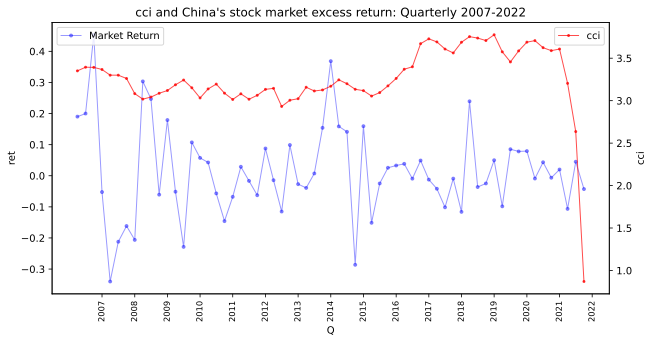

In [112]:
%%time
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  

ax1.plot(Q_reg_data['Raw_return'],
         color='blue',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='Market Return')
ax1.set_xlabel('Q') 
ax1.set_ylabel('ret')  
ax1.legend(loc=2)  
ax1.set_title("cci and China's stock market excess return: Quarterly 2007-2022")  

ax2 = ax1.twinx()  
ax2.plot(Q_reg_data['cci'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='cci')
ax2.set_ylabel('cci')  
ax2.legend(loc=1)  

year_freq = pd.date_range(start='2007', end='2023', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('Qcci.pdf', bbox_inches='tight')

In [113]:
Q_reg_data['lcci'] = Q_reg_data['cci'].shift(1)
model_qcpi = smf.ols('Raw_return ~ lcci',
                 data=Q_reg_data['2007-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                     1.255
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.267
Time:                        17:00:06   Log-Likelihood:                 31.764
No. Observations:                  61   AIC:                            -59.53
Df Residuals:                      59   BIC:                            -55.31
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1836      0.157      1.168      0.2

## 长期预测

长期预测数据p值与季度结果相似，但是回归系数减小仍呈负相关。

In [114]:
reg_data['next_ret'] = reg_data['Raw_return'].shift(-1) + 1
reg_data['next_ret2'] = reg_data['Raw_return'].shift(-2) + 1
reg_data['next_ret3'] = reg_data['Raw_return'].shift(-3) + 1
reg_data['future_3month_return'] = reg_data['next_ret'] * reg_data['next_ret2'] * reg_data['next_ret3'] - 1
reg_data

,Log_return,Raw_return,cci,cpi,lcci,lcpi,next_ret,next_ret2,next_ret3,future_3month_return
month,,,,,,,,,,
2006-12-31,0.242526,0.274464,1.124,2.8000,NaN,NaN,1.041439,1.033998,1.105138,0.190064
2007-01-31,0.040604,0.041439,1.118,2.2000,1.124,NaN,1.033998,1.105138,1.206437,0.378608
2007-02-28,0.033433,0.033998,1.110,2.7000,1.118,2.8000,1.105138,1.206437,1.069868,0.426432
2007-03-31,0.099970,0.105138,1.123,3.3000,1.110,2.2000,1.206437,1.069868,0.929690,0.199976
2007-04-30,0.187671,0.206437,1.128,3.0000,1.123,2.7000,1.069868,0.929690,1.170212,0.163946
...,...,...,...,...,...,...,...,...,...,...
2022-03-31,-0.062604,-0.060685,0.867,1.5000,1.132,0.9000,0.936923,1.045739,1.066592,0.045022
2022-04-30,-0.065154,-0.063077,0.868,2.1304,0.867,0.9000,1.045739,1.066592,0.957224,0.067665
2022-05-31,0.044724,0.045739,0.889,2.1000,0.868,1.5000,1.066592,0.957224,NaN,NaN


In [115]:
model_cpi_3month = smf.ols('future_3month_return ~ lcci',
                 data=reg_data['2007-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi_3month.summary())

                             OLS Regression Results                             
Dep. Variable:     future_3month_return   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.097
Date:                  Tue, 10 Jan 2023   Prob (F-statistic):              0.296
Time:                          17:00:06   Log-Likelihood:                 94.870
No. Observations:                   184   AIC:                            -185.7
Df Residuals:                       182   BIC:                            -179.3
Df Model:                             1                                         
Covariance Type:                    HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1657      0.153

## 预测波动率

由结果可知，cci对于预测波动率呈正相关且显著性很高。由此可见，消费者信心指数可以较好的预测波动率。

In [116]:
model_cci = smf.ols('cci ~ lcci + lcpi',
                 data=reg_data['2007-01':'2022-07']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cci.summary())

                            OLS Regression Results                            
Dep. Variable:                    cci   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1686.
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          1.32e-118
Time:                        17:00:06   Log-Likelihood:                 384.59
No. Observations:                 186   AIC:                            -763.2
Df Residuals:                     183   BIC:                            -753.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0473      0.018      2.647      0.0